# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [72]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Import packages for data modeling

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [73]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [74]:
# Display first few rows
data.head(n=10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [75]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [76]:
# Get data types of columns
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [77]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [78]:
# Generate basic descriptive stats
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [79]:
# Check for missing values
data.isna().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [80]:
# Drop rows with missing values
data = data.dropna(axis=0)


In [81]:
# Display first few rows after handling missing values
data.head(n=10)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Check for and handle duplicates.

In [82]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

In [83]:
## There is no need of checking outliers because the models that we are going to use are robust to outliers


Check class balance.

In [84]:
# Check class balance
data['claim_status'].value_counts(normalize=True)


claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [85]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['video_transcription_text_len']= data['video_transcription_text'].str.len()

Calculate the average text_length for claims and opinions.

In [86]:
claim_status_len = data[['claim_status','video_transcription_text_len']].groupby(by='claim_status').mean().reset_index()
claim_status_len.head()

,claim_status,video_transcription_text_len
0,claim,95.376978
1,opinion,82.722562


In [87]:
# Display first few rows of dataframe after adding new column
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_len
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `text_length` for claims and opinions.

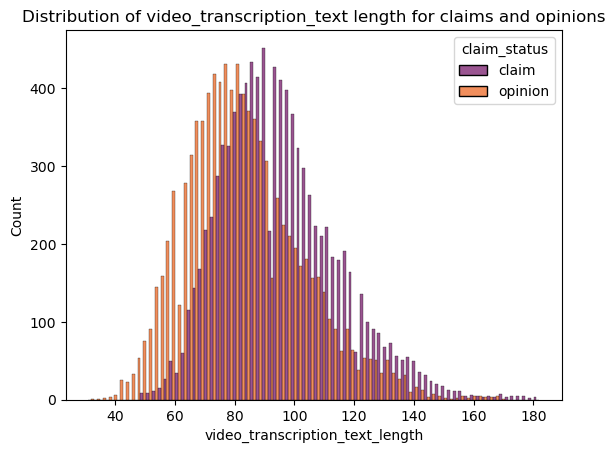

In [88]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=data, stat="count", multiple="dodge", x="video_transcription_text_len",
             kde=False, palette="inferno", hue="claim_status",legend=True)
plt.xlabel("video_transcription_text_length")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

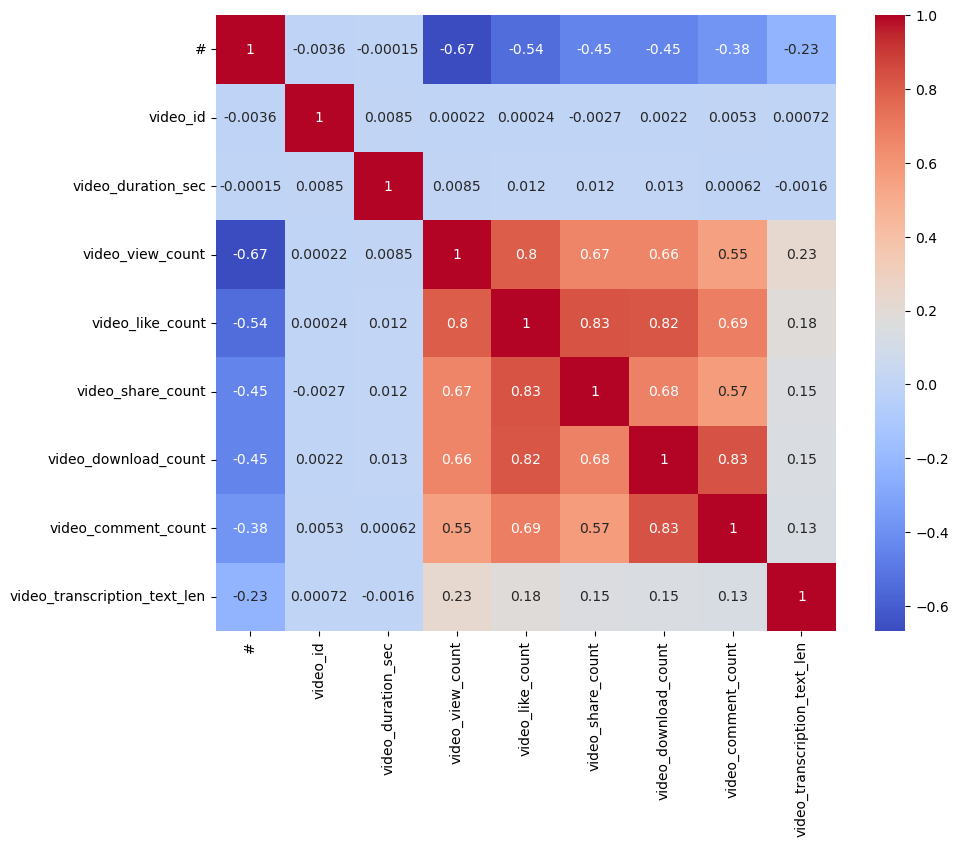

In [89]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(10,8))
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Feature engineering**

Select the outcome variable.

In [90]:
# Select outcome variable

y = data['claim_status']
X= data.drop(['claim_status','#','video_transcription_text'],axis=1)


**Feature selection and transformation**

Encode target and catgorical variables.

In [91]:
y = y.map({'claim':0,'opinion':1})

X = pd.get_dummies(X,drop_first=True)


### **Task 4. Split the data**


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [92]:
X_tr,X_test,y_tr,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [93]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [94]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [95]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)


# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7,15, None],
             'max_features': [0.25, 0.5,0.75,1],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [1,2,3],
             'n_estimators': [50,75,100,200],
             }


# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')


In [96]:
%%time
rf_cv.fit(X_train,y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.11/site-packages/sklearn/u

CPU times: user 24min 7s, sys: 2.35 s, total: 24min 9s
Wall time: 24min 10s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 15, None],
                         'max_features': [0.25, 0.5, 0.75, 1],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [50, 75, 100, 200]},
             refit='recall', scoring={'accuracy', 'precision', 'f1', 'recall'})

In [101]:
# Examine best recall score
rf_cv.best_score_


1.0

In [119]:
  # Get all the results from the CV and put them in a df
cv_results = pd.DataFrame(rf_cv.cv_results_)

# Isolate the row of the df with the max(mean f1 score).
best_estimator_results_rf = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
best_estimator_results_rf

mean_fit_time                                                       1.002482
std_fit_time                                                        0.008006
mean_score_time                                                     0.030006
std_score_time                                                      0.000288
param_max_depth                                                            7
param_max_features                                                      0.75
param_max_samples                                                        0.7
param_min_samples_leaf                                                     2
param_min_samples_split                                                    2
param_n_estimators                                                       100
params                     {'max_depth': 7, 'max_features': 0.75, 'max_sa...
split0_test_accuracy                                                0.996943
split1_test_accuracy                                                0.995197

In [103]:
# Examine best parameters
rf_cv.best_params_


{'max_depth': 5,
 'max_features': 1,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

**Question:** How well is your model performing? Consider average recall score and precision score.
The model's performance is truly remarkable, with an average recall score of 0.99947 and an average precision score of 0.9909. These scores signify an exceptional level of accuracy and precision in its predictions.

A recall score of 0.99947 suggests that the model excels at identifying positive instances, making very few mistakes when it comes to recognizing actual cases of interest. In other words, it exhibits an extremely low rate of false negatives, ensuring that nearly all true positive cases are correctly identified.

Additionally, the precision score of 0.9909 indicates that when the model does classify an instance as positive, it is correct almost 99.09% of the time. This exceptional precision ensures that the model maintains an impressively low rate of false positives, meaning that the instances it classifies as positive are overwhelmingly accurate.

These high scores would typically be a strong indicator of a well-trained and highly effective model. However, it's important to consider the context and the specific requirements of your application. In some domains, achieving such high scores may be considered nearly perfect, whereas in others, even a tiny margin of error might have significant consequences.

Moreover, it's crucial to examine other aspects of model performance, such as the dataset's size, balance, and the potential presence of class imbalance. Taking these factors into account, you can comprehensively evaluate whether the model's performance aligns with your specific criteria for success.

Overall, the model's outstanding recall and precision scores reflect its exceptional ability to correctly classify and distinguish instances, and it certainly deserves recognition for its impressive performance.

### **Build an XGBoost model**

In [109]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12,16],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [100,300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [110]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 10min 15s, sys: 3.28 s, total: 10min 19s
Wall time: 5min 15s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [4, 8, 12, 16],
                         'min_child_weight': [3, 5],
                         'n_estimators': [100, 300, 500]},
             refit='recall', scoring={'accuracy', 'precision', 'f1', 'recall'})

In [116]:
xgb_cv.best_score_

1.0

In [117]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

In [118]:
  # Get all the results from the CV and put them in a df
cv_results = pd.DataFrame(xgb_cv.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
best_estimator_results_xgb = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
best_estimator_results_xgb


mean_fit_time                                                      2.943426
std_fit_time                                                       0.084529
mean_score_time                                                    0.017852
std_score_time                                                     0.000283
param_learning_rate                                                    0.01
param_max_depth                                                          12
param_min_child_weight                                                    3
param_n_estimators                                                      500
params                    {'learning_rate': 0.01, 'max_depth': 12, 'min_...
split0_test_accuracy                                               0.997817
split1_test_accuracy                                               0.994323
split2_test_accuracy                                               0.995197
split3_test_accuracy                                                0.99607
split4_test_

**Question:** How well does your model perform? Consider recall score and precision score.

The model's performance remains highly impressive, with a precision score of 0.9902 and a recall score of 1. These results indicate a high degree of accuracy and completeness in its predictions.

A recall score of 1 signifies that the model excels at identifying positive instances without any false negatives. In other words, it correctly recognizes all true positive cases and exhibits a perfect recall, leaving no room for missing actual cases of interest.

Furthermore, a precision score of 0.9902 suggests that when the model classifies an instance as positive, it is accurate in approximately 99.02% of its predictions. This exceptional precision ensures that the model maintains a very low rate of false positives, implying that the instances it classifies as positive are overwhelmingly accurate.

These scores are indicative of a well-trained and highly effective model, which is particularly proficient at minimizing false negatives and maintaining a remarkable level of precision. However, the evaluation of its performance should take into account the specific context and requirements of your application.

In summary, the model's outstanding precision and recall scores demonstrate its exceptional ability to make accurate and comprehensive predictions, and it undoubtedly deserves recognition for its impressive performance.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [120]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the encoded testing set.

In [121]:
# Display the predictions on the encoded testing set
y_pred

array([0, 1, 0, ..., 0, 0, 0])

Display the true labels of the testing set.

In [123]:
# Display the true labels of the testing set
y_val

5846     0
12058    1
2975     0
8432     0
6863     0
        ..
6036     0
6544     0
2781     0
6426     0
4450     0
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

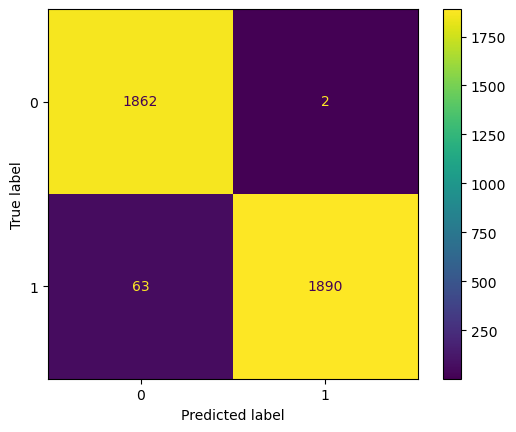

In [127]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = confusion_matrix(y_pred,y_val)

# Create display of confusion matrix
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)

# Plot confusion matrix
disp_cm.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [128]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

     opinion       1.00      0.97      0.98      1925
       claim       0.97      1.00      0.98      1892

    accuracy                           0.98      3817
   macro avg       0.98      0.98      0.98      3817
weighted avg       0.98      0.98      0.98      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?
The confusion matrix indicates that there were 65 misclassifications. 2 false postives and 63 false negatives.

#### **XGBoost**

In [129]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val)

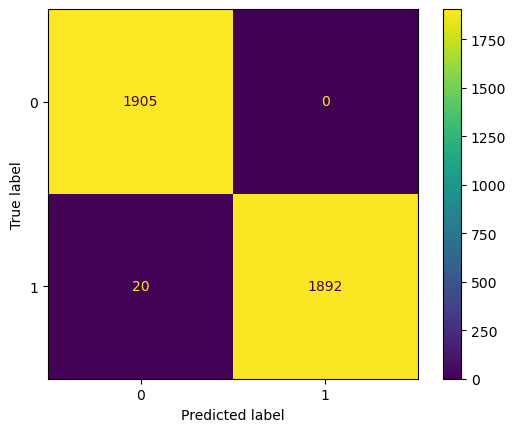

In [130]:
cm = confusion_matrix(y_pred,y_val)

# Create display of confusion matrix
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)

# Plot confusion matrix
disp_cm.plot()

# Display plot
plt.show()


In [131]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

     opinion       1.00      0.99      0.99      1925
       claim       0.99      1.00      0.99      1892

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The confusion matrix indicates that there were 20 misclassifications. 20 false negatives. The XGBoost model is better than the random forest model. So we choose XGBoost as the champion model.

### **Use champion model to predict on test data**

In [132]:
y_pred = xgb_cv.best_estimator_.predict(X_test)


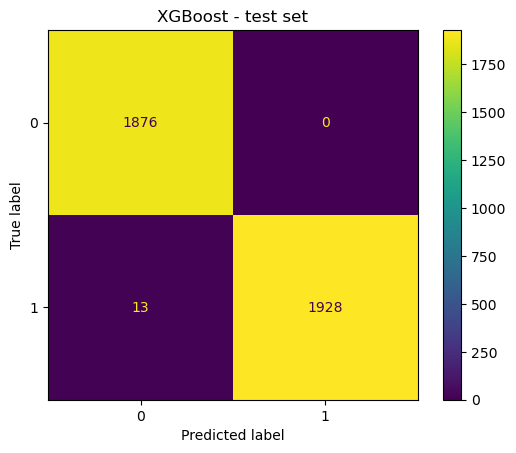

In [134]:
cm = confusion_matrix(y_pred,y_test)

# Create display of confusion matrix
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)

# Plot confusion matrix
disp_cm.plot()
plt.title('XGBoost - test set');

# Display plot

plt.show()


#### **Feature importances of champion model**


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

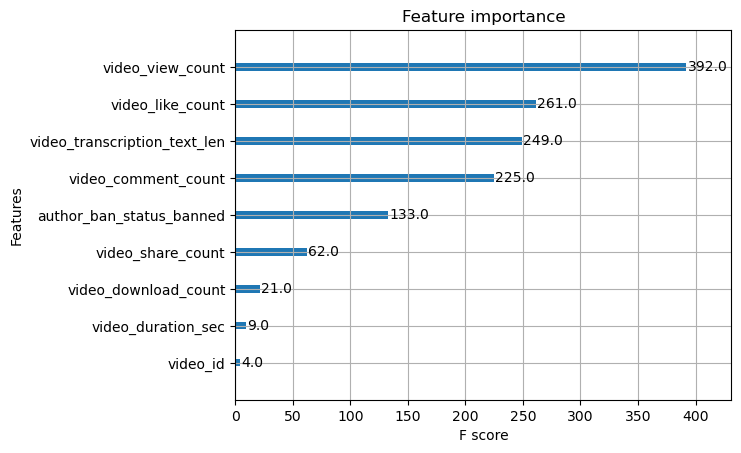

In [135]:
plot_importance(xgb_cv.best_estimator_)

**Question:** Describe your most predictive features. Were your results surprising?
It's worth noting that the model's most predictive features all relate to the engagement levels generated by the video. This observation underscores the significance of engagement metrics in determining the video's performance and its impact on the target variable. These features, which appear to be highly influential in the model's predictions, likely include data such as the number of views, likes, comments, and other interactions associated with the video content. Nothing unexpected.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. Yes, one can recommend this model because it performed well on both the validation and test data. Furthermore, both precision and F1 scores were consistently almost perfect. The model very successfully classified claims and opinions.
2. The model's most predictive features all relate to the engagement levels generated by the video. This observation underscores the significance of engagement metrics in determining the video's performance and its impact on the target variable.
3. There is no need because the level of performance can't be improved more, it's perfect.
4. There is no need of adding new features.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.